# Aula 03 - Criando e Desenhando em Imagens

<p align="center"><img src="https://miro.medium.com/max/3200/0*7s3HcYYvpnUhzDkG.png" width="60%"></p>


O primeiro passo para começarmos a trabalhar com imagens é carregar as bibliotecas. Aqui, vamos usar algumas velhas conhecidas, e também o OpenCV.


In [1]:
def isColab():
    import sys
    try:
        return 'google.colab' in sys.modules
    except:
        return False

In [2]:
# importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
if isColab():
    from google.colab.patches import cv2_imshow

Para ler imagens, vamos armazenar a mesma em uma variável, e carregar com `cv2.imread`. Esse processo é parecido com a forma que carregamos datasets em csv.

In [3]:
# ler imagem
img = cv2.imread("./resources/people.jpeg")

Para visualizar a imagem, basta usar o `cv2_imshow`.

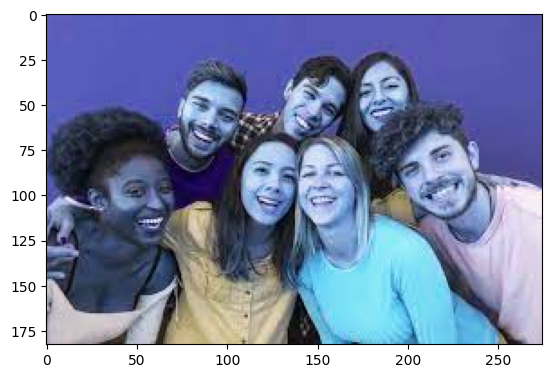

In [4]:
# visualizando a imagem
if isColab():
    cv2_imshow(img)
else:
    # caso esteja rodando fora do docker
    #cv2.imshow("Imagem", img)
    plt.imshow(img, cmap='gray')
    plt.show()
    

Temos que lembrar que uma imagem é um array de pixels, distribuídos em canais. Por isso recebemos esses 3 números abaixo.

Portanto, lemos que a nossa imagem tem 915 pixels de altura e de largura, e 3 canais.

In [5]:
# verificando as dimensões da imagem
img.shape

(183, 275, 3)

Abaixo, podemos ver a quantidade total de pixels que compõem a nossa imagem.

In [6]:
img[20, 20]

array([ 88,  94, 189], dtype=uint8)

Assim como fazemos com datasets em CSV, é interessante criar cópias para fazer manipulações, por isso, vamos criar uma cópia da nossa imagem antes das manipulações.

As alterações feitas no OpenCV são feitas como que se fosse `inplace`. Por isso, é vital que tenhamos uma cópia, para que tenhamos esse checkpoint.

In [7]:
# criando uma cópia
img_cp = img.copy()

A primeira coisas que vamos fazer é desenhar um retângulo. Para isso, vamos usar a função `rectangle`, que toma como argumentos a imagem que será manipulada, o ponto de início, ponto de término, cor do retângulo e grossura do mesmo.

Com isso, temos o resultado abaixo.

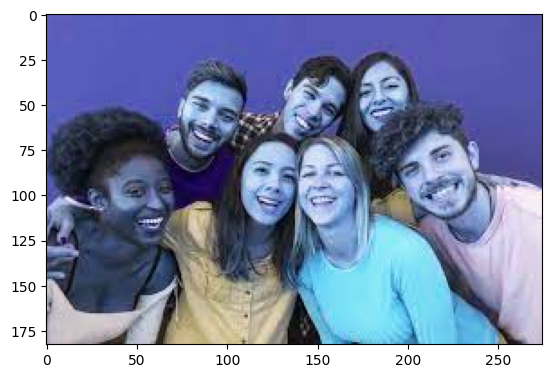

In [8]:
# imagem, ponto de inicio, ponto de termino, cor do retangulo, grossura
img_rectangle = cv2.rectangle(img_cp, (350, 140), (490, 350), (0, 255, 0), 10)

plt.imshow(img_rectangle, cmap='gray')
plt.show()

Por fim, vamos escrever em cima da imagem. Isso seria útil, novamente, em um projeto que identifique pessoas ou objetos, por exemplo.

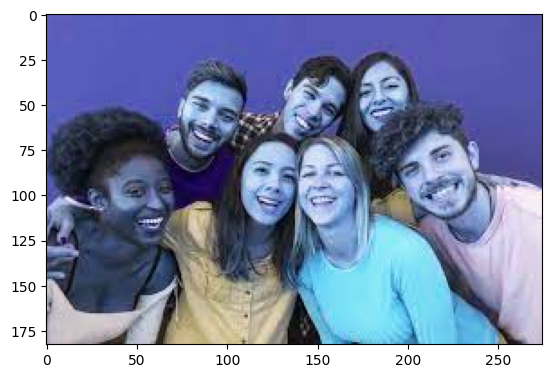

In [9]:
# fazer copia da imagem
img_cp = img.copy()

# desenhar retangulo
cv2.rectangle(img_cp, (350, 140), (490, 350), (0, 255, 0), 3)

# colocar texto por cima
font = cv2.FONT_HERSHEY_SIMPLEX
#cv2_imshow(cv2.putText(img_cp, 'Teste', (350, 380), font, 1, (0, 255, 0), 3))
plt.imshow(cv2.putText(img_cp, 'Teste', (350, 380), font, 1, (0, 255, 0), 3), cmap='gray')
plt.show()

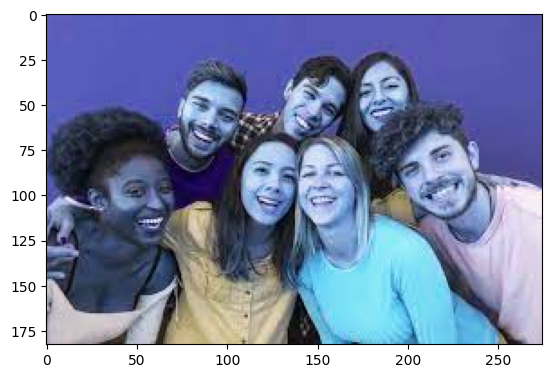

In [10]:
# ler um arquivo
image = cv2.imread("./resources/people.jpeg")
#cv2_imshow(image)
plt.imshow(image)
plt.show()

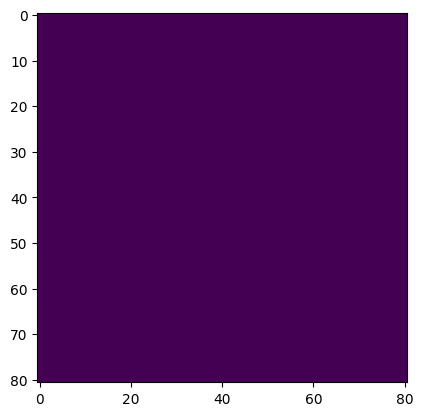

In [11]:
# criar uma imagem
igor_image = np.zeros((81,81), dtype=np.uint8)
#cv2_imshow(igor_image)
plt.imshow(igor_image)
plt.show()

## Desenhar uma Imagem

Da mesma forma que fizemos na aula anterior, podemos desenhar em cima dessa imagem que criamos.

Como estamos tratando de um array, nós podemos também utilizar **slicing** para definir as posições onde iremos desenhar.

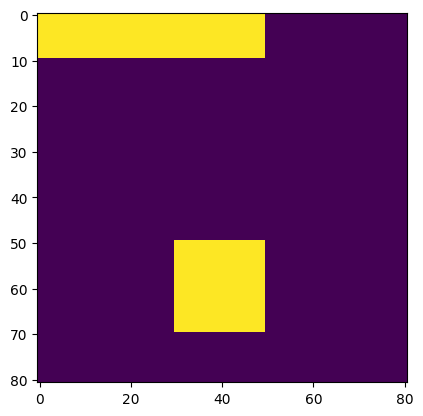

In [12]:
# desenhar na imagem
igor_image[0:10, 0:50] = 255
igor_image[50:70, 30:50] = 255
#cv2_imshow(igor_image)
plt.imshow(igor_image)
plt.show()

In [13]:
# ver as dimensões
print(igor_image.shape)

(81, 81)


## Converter para BGR

Por padrão , o OpenCV utiliza a escala RGB ao contrário. Na imagem que criamos anteriormente, temos apenas dois canais. Mas é possível converter uma imagem com 2 canais para 3, na escala RGB, ou BGR, no caso do OpenCV.

Para fazer conversões, precisamos buscar dentro do OpenCV o esquema de cores que queremos converter. Pode ser um pouco desafiador no começo, então a dica é usar o auto complete, para buscar o que você precisa.

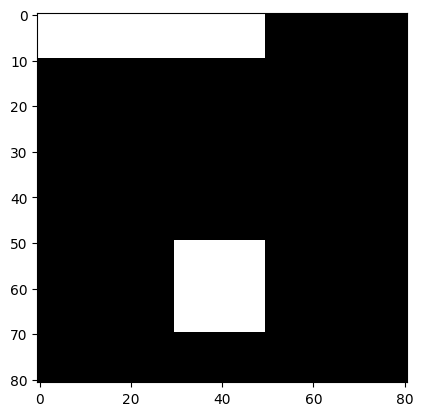

(81, 81, 3)


In [14]:
# convertendo a imagem para BGR
igor_image = cv2.cvtColor(igor_image, cv2.COLOR_GRAY2BGR)
#cv2_imshow(igor_image)
plt.imshow(igor_image)
plt.show()
print(igor_image.shape)

Acima, podemos ver que apesar de não ter mudado nada na representação da imagem, ao verificar o shape, verificamos que agora a imagem tem 3 canais.

## Converter Para Outro Tipo de Arquivo (PNG <-> JPG)

Outra funcionalidade interessante é a conversão de formato de imagem. O OpenCV reconhece diversos formatos diferentes, e com isso, conseguimos usar o `imwrite` direto para salvar o arquivo em um novo formato.

In [15]:
# convertendo o formato da imagem
cv2.imwrite('foto_nova.jpg', image)

True

## Carregar Imagem em Grayscale

Por padrão, o OpenCV carrega imagens utilizando 3 canais, mesmo que o arquivo tenha sido criado e salvo em grayscale, por exemplo, com um único canal, ao abrirmos a imagem dentro do OpenCV, ele a abre com 3 canais (BGR).

Caso queiramos abrir ela em Grayscale, assim como foi criada, precisamos abrir utilizando um módulo específico para isso. `cv2.IMREAD_GRAYSCALE` após o path da imagem.

## Modos do `cv2.imread`

Abaixo, segue uma lista de modos úteis para leitura de arquivos com o OpenCV.

- cv2.IMREAD_COLOR
	- 3 canais de cores (BGR), com 8-bit value (0-255)
- cv2.IMREAD_GRAYSCALE
	- 8-bit grayscale image
- cv2.IMREAD_ANYCOLOR
	- Dependente do metadado da imagem. Pode retornar 8-bit por canal BGR ou 8-bit grayscale
- cv2.IMREAD_UNCHANGED 
	- Lê todos os dados da image, incluindo o canal alpha, se existir.
- cv2.IMREAD_REDUCED_GRAYSCALE_2 / 4 / 8
	- Carrega uma imagem na metade da resolução original, em grayscale
- cv2.IMREAD_REDUCED_COLOR_2  / 4 / 8
	- Carrega uma imagem na metade da resolução original, em BGR.

## Transformações Geométricas

Redimensionar imagens também é necessário ao se trabalhar com Visão Computacional. Isso pode ser feito de forma simples, como colocamos abaixo.

Se você quiser saber um pouco mais sobre *interpolation*, vamos deixar aqui um [link](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm) de referência sobre o assunto.

### Escala
A primeira manipulação que faremos nesse sentido é a mudança de escala. Isso é útil para que aumentar ou diminuir o tamanho de uma imagem.

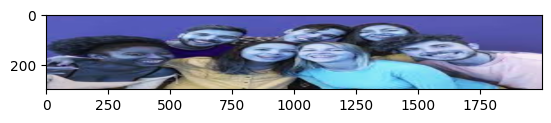

In [16]:
# valores absolutos
resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)
#cv2_imshow(resized_image)
plt.imshow(resized_image)
plt.show()

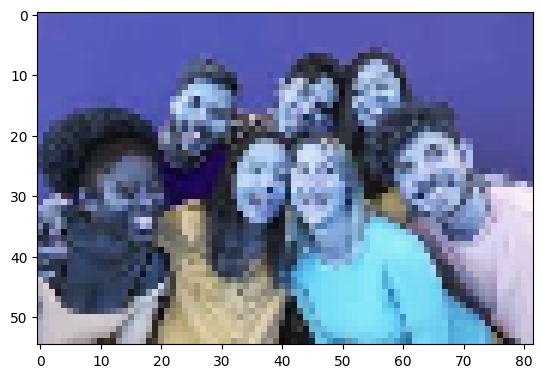

In [17]:
# ratio
dst_image = cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
#cv2_imshow(dst_image)
plt.imshow(dst_image)
plt.show()

- **Interpolação**
	- Aumentar a imagem
		- Geralmente, a melhor abordagem é cv2.INTER_CUBIC ou CV2.INTER_LINEAR
	- Diminuir a imagem
		- Geralmente, a melhor abordagem é usar cv2.INTER_LINEAR

### Translation

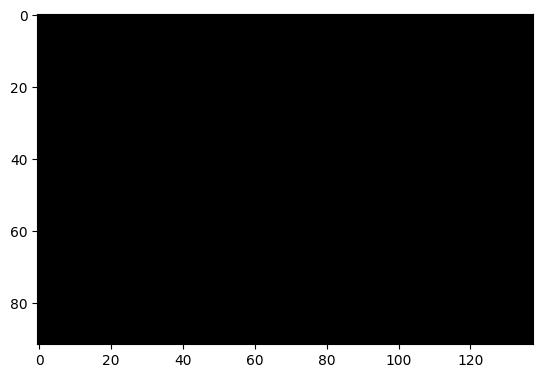

In [18]:
# translation
image = cv2.imread("./resources/people.jpeg", cv2.IMREAD_REDUCED_COLOR_2)
height, width = image.shape[:2]
M = np.float32([[1, 0, 200], [0, 1, 30]])
dst_image = cv2.warpAffine(image, M, (width, height))
#cv2_imshow(dst_image)
plt.imshow(dst_image)
plt.show()

In [19]:
# merge
image_copy =cv2.merge((12, 10, 40))

### Rotação

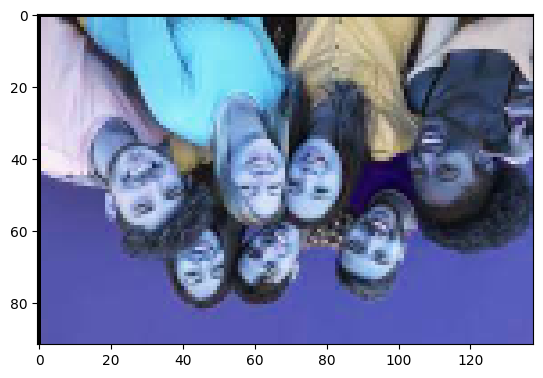

In [20]:
# rotacao
height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(image, M, (width, height))
#cv2_imshow(dst_image)
plt.imshow(dst_image)
plt.show()

### Cropping

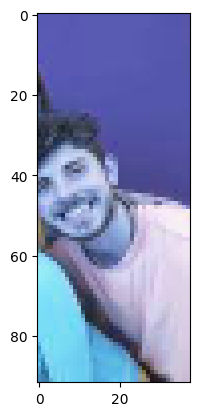

In [21]:
# cropping an image
cropped_image = image[0:300, 100:400, :]
#cv2_imshow(cropped_image)
plt.imshow(cropped_image)
plt.show()

## Filtros e Operações Aritméticas

O filtro na verdade é uma pequena matriz que usamos para deixar a imagem mais nítida ou borrada, por exemplo. Para fazer isso, precisamos fazer uma operação de convolução.

Vamos ver, na prática o que seria uma convolução, em termos simples. 

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O próximo passo é fazer uma operação de convolução com filtro 3x3. O produto final desse processo de convolução será uma matriz 4x4. Nós calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como você pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Após avaliar a e excpressão acima nós obtemos o resulto de -5. Esse será o valor do pixel naquela posição na nossa imagem com o filtro aplicado. Então, nós vamos movendo o filtro ao longo da imagem e vamos criando a imagem pronta.

Note que o nosso filtro é uma matriz com a mesma altura e largura (3×3, 5×5, 9×9). Sempre usamos números ímparespois precisamos ter um pixel ao centro dessa matriz.

Agora que temos uma intuição de como a matriz funciona, vamos ver ela em ação na prática.


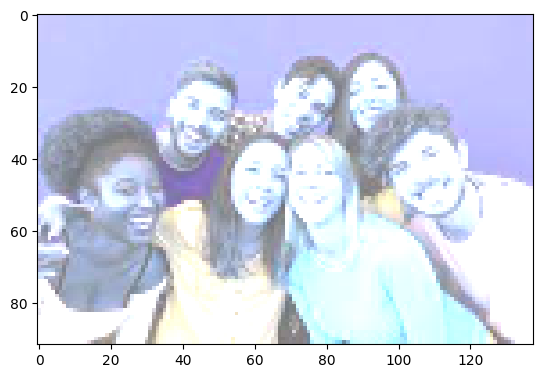

In [22]:
# utilizando o ones do numpy para criar o filtro
filtro_1 = np.ones(image.shape, dtype=np.uint8) * 110

# aplicando o filtro à imagem
somada = cv2.add(image, filtro_1)

# mostrando a imagem com filtro
#cv2_imshow(somada)
plt.imshow(somada)
plt.show()

Esse primeiro filtro nos permitiu aumentar o brilho em toda a imagem, pois adicionamos o valor do filtro à nossa imagem original.

Para escurecer a imagem, vamos fazer a operação contrária, diminuindo os valor dos nossos pixels.

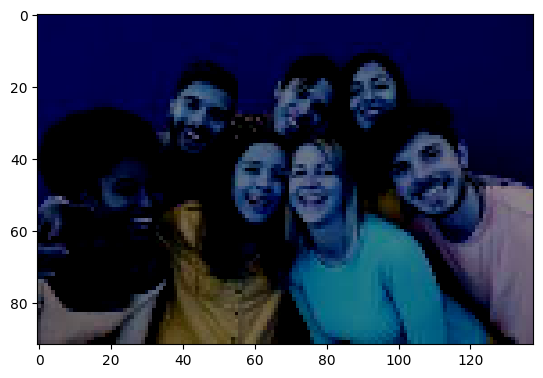

In [23]:
# criando filtro
filtro_2 = np.ones(image.shape, dtype=np.uint8) * 110

# aplicando filtro
subtraida = cv2.subtract(image, filtro_1)

# imagem com filtro
#cv2_imshow(subtraida)
plt.imshow(subtraida)
plt.show()

### Blurring
Nas operações acima, nós estávamos tratando apenas de um canal, o que não é o mais comum quando lidamos com imagens, que normalmente estão no padrão **RGB** (Red, Blue, Green). Por isso, precisamos de outra forma de lidar com essas imagens.

Quando pensamos em canais como sendo uma "visão" da imagem como um todo, dando ênfase ou escondendo determinadas partes de acordo com as características de cada canal.


<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distinção de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel são praticamente intercambiáveis, mas em geral, quando falamos de mais canais, eles são bem diferentes. 

Cada filtro, na verdade, é uma coleção de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo único. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma versão processada de cada um. É importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em ênfases em determinados canais, ou um canal ser mais sensível a mudanças que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Então, cada uma das versões processadas por cada canal são somadas, formando um canal único. Os kernels de um filtro produzem uma versão para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um viés, peso. A forma que o *bias* funciona é que cada output de filtro possui um viés. Esse viés é adicionado ao canal obtido como output até agora e produz o output final do canal.

Portanto, quando falamos em qualquer número de filtros, a forma de trabalho será idêntica: Cada filtro processa o input por si só, juntamos diferentes conjuntos de kernels com um viés através do processo descrito acima, produzindo um canal de output único. Então, eles são concatenados para produzir um output geral final, com o número de canais sendo o número de filtros. Normalmente, também é aplicada uma não-linearidade passando esse input por outra camada de convolução, o que repete o processo.

Vamos ver como isso funciona na prática.


In [24]:
# # kernels arbitrários
# kernel = np.array([[1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9]])

# kernel_image = cv2.filter2D(image, -1, kernel)

# cv2_imshow(kernel_image)

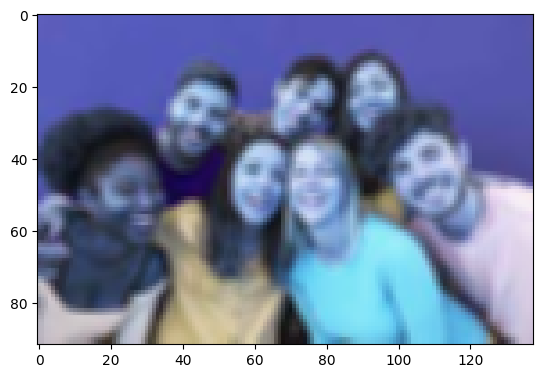

In [25]:
# criando o kernel
kernel_blur = np.ones((3,3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(image, -1, kernel_blur)

# mostrando a imagem com filtro
#cv2_imshow(blurred)
plt.imshow(blurred)
plt.show()

Aqui, podemos ver o resultado do filtro, que foi utilizado para embaçar a imagem.

Também podemos aumentar a "força" desse efeito, mudando o parâmetro pelo qual a matriz é dividida.

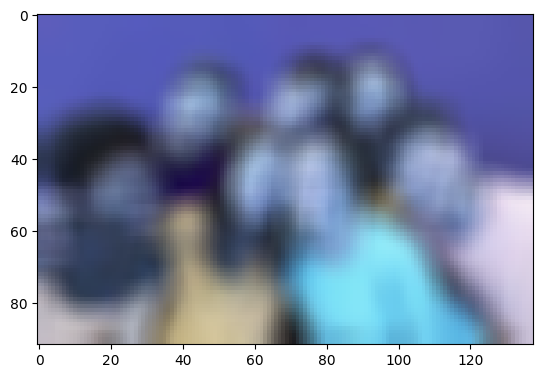

In [26]:
# criando o kernel
kernel_blur = np.ones((9,9), np.float32) / 81

# aplicando o filtro
blurred = cv2.filter2D(image, -1, kernel_blur)

# verificando o resultado
#cv2_imshow(blurred)
plt.imshow(blurred)
plt.show()

Como podemos ver, a foto está bem mais embaçada com o nosso filtro mais forte.

### Gaussian Blur

Outra forma de aplicar um *blur*, um embaçado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro é um pouco mais complexo, mas é o tipo de kernel mais usado para processamento de imagens.

Para a criação desse filtro nós usamos a **Função Gaussiana**. Essa função representa a probabilidade de eventos serem centrdos ao redor do valor da média. Além disso, o desvio padrão (𝜎) dessa função controla quão ampla será essa distribuição. Ao tirar amostras de valores dessa função, nós consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padrão podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

Agora que temos uma intuição no assunto, vamos ver como tudo isso fica na prática.



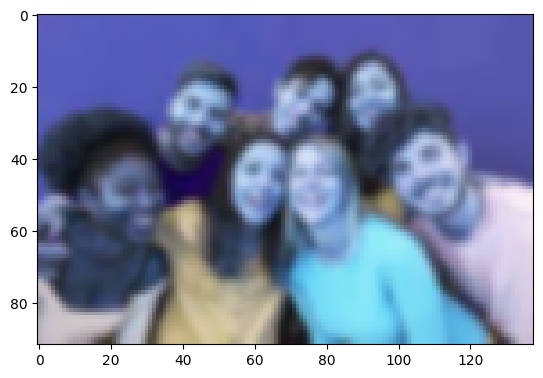

In [27]:
# utilizando o GaussianBlur, que já é implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(image, (5,5), 0)

# visualizando a imagem
#cv2_imshow(gaussian_blurred)
plt.imshow(gaussian_blurred)
plt.show()

Agora que sabemos o que acontece por trás, podemos usar sem medo essa implementação simples e direta que o OpenCV proporciona, sem muito trabalho, e com apenas uma linha de código.

### Motion Blur

Da mesma forma que implementamos o blur acima, também podemos implementar um outro tipo de embaçado, o *Motion Blur*.

Motion significa movimento, então esse embaçado vai buscar agir de forma a acrescentar um embaçado que passe a impressão de movimento na imagem.

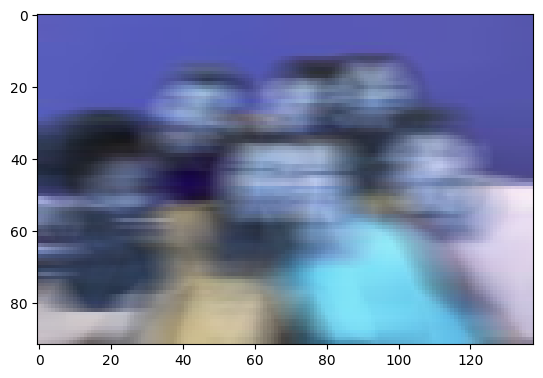

In [28]:
# implementando o filtro
kernel_motion_blur = np.zeros((15, 15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(image, -1, kernel_motion_blur)

# plotando a imagem
#cv2_imshow(motion_blurred)
plt.imshow(motion_blurred)
plt.show()

### Sharpening

O contrário de embaçar a foto, seria deixar ela mais bem definida, "afiar" a imagem. E esse é o conceito do *Sharpening*.

Nosso objetivo aqui é exatamente esse, melhorar a nitidez, deixar a imagem menos embaçada. Para isso, também podemos usar o OpenCV.

O processo de sharpening é usado, normalmente, para melhorar os "limites" dentro da imagem, os *edges*. Existem muitas formas de criar filtros para melhorar as bordas dentro da imagem, mas uma delas pode ser vista aqui embaixo:

<p align="center"><img src="http://media5.datahacker.rs/2020/04/25-279x300.jpg" width="30%" ></p>

Abaixo, podemos ver essa implementação em forma de código, onde criamos o array que representa esse filtro de sharpening. Esse filtro tem um centro positivo de 9 e todos os outros pontos possuem o valor -1. 

Para esse tipo de filtro, nós não temos uma implementação oficial do OpenCV. Por isso, vamos usar a função `cv2.filter2D()` que vai processar nossa imagem com um filtro criado por nós, arbitrariamente. Esse filtro é comumente usado para fazer sharpening em imagens coloridas.

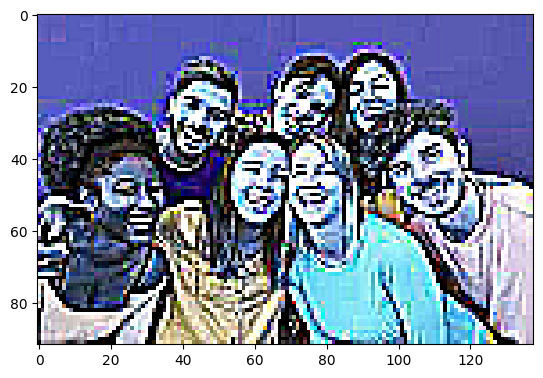

In [29]:
# criando o filtro de sharpening
kernel_sharpening_1 = np.array([[-1,-1,-1],
                                [-1,9,-1],
                                [-1,-1,-1]])

# implementando o filtro 
sharpened = cv2.filter2D(image, -1, kernel_sharpening_1)

# mostrando a imagem
#cv2_imshow(sharpened)
plt.imshow(sharpened)
plt.show()

### Bitwise Operations


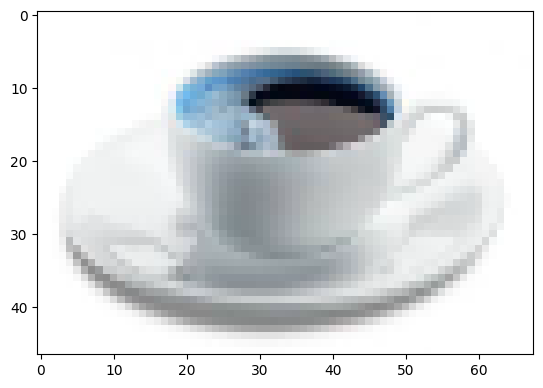

(47, 68, 3)


In [30]:
redu_image = cv2.imread('./resources/cafe.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
#cv2_imshow(redu_image)
plt.imshow(redu_image)
plt.show()
print(redu_image.shape)

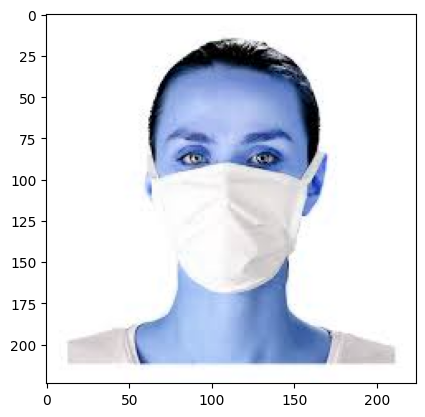

In [31]:
mask_image = cv2.imread("./resources/mascara_sigmoidal.jpeg")
#cv2_imshow(mask_image)
plt.imshow(mask_image)
plt.show()

In [32]:
# bitwise AND
bitwise_and = cv2.bitwise_and(redu_image, mask_image)
#cv2_imshow(bitwise_and)
plt.imshow(bitwise_and)
plt.show()

error: OpenCV(4.7.0) /io/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


In [ ]:
# bitwise OR
bitwise_or = cv2.bitwise_or(redu_image, mask_image)
#cv2_imshow(bitwise_or)
plt.imshow(bitwise_or)
plt.show()

mask_image.shape